In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

<center><h2>Sorting!</h2></center>

In [2]:
df = pd.read_csv("causes_of_death.csv")
df

,Year,Cause,Age Adjusted Death Rate
0,2015,Heart Disease,168.5
1,2015,Cancer,158.5
2,2015,Stroke,37.6
3,2015,Accidents,43.2
4,2015,Influenza and Pneumonia,15.2
...,...,...,...
575,1900,Heart Disease,265.4
576,1900,Cancer,114.8
577,1900,Stroke,244.2
578,1900,Accidents,90.3


Let's say we want to sort primarily by "Year", and then within each year, have a subsort by "Age Adjusted Death Rate". Notice I have implemented this below (do not worry about syntax as it's irrelevant to CIS 212):

In [3]:
df.sort_values(["Year","Age Adjusted Death Rate"])

,Year,Cause,Age Adjusted Death Rate
578,1900,Accidents,90.3
576,1900,Cancer,114.8
577,1900,Stroke,244.2
575,1900,Heart Disease,265.4
579,1900,Influenza and Pneumonia,297.5
...,...,...,...
4,2015,Influenza and Pneumonia,15.2
2,2015,Stroke,37.6
3,2015,Accidents,43.2
1,2015,Cancer,158.5


See how the dataframe is sorted by the primary key of year in ascending order, then by the secondary key, age adjusted death rate. 

**Is this the same as what I have said below?**

Notice I am sorting the dataframe by "Age Adjusted Death Rate", then sorting by "Year"

In [4]:
df.sort_values("Age Adjusted Death Rate").sort_values("Year")  # sort by AADR then sort again by Year

,Year,Cause,Age Adjusted Death Rate
578,1900,Accidents,90.3
579,1900,Influenza and Pneumonia,297.5
577,1900,Stroke,244.2
575,1900,Heart Disease,265.4
576,1900,Cancer,114.8
...,...,...,...
2,2015,Stroke,37.6
3,2015,Accidents,43.2
4,2015,Influenza and Pneumonia,15.2
1,2015,Cancer,158.5


What happened? The Year column seems correct but the AADR column is not sorted!

Let's check the documentation for pandas sort_values function: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

Why did this happen?

Let's modify the characteristics of the sort_values function to get a correct primary sort of "Year" and a secondary sort of "Age Adjusted Death Rate"!

In [11]:
df.sort_values("Age Adjusted Death Rate", kind="stable").sort_values("Year", kind="mergesort") # use stable sort

,Year,Cause,Age Adjusted Death Rate
578,1900,Accidents,90.3
576,1900,Cancer,114.8
577,1900,Stroke,244.2
575,1900,Heart Disease,265.4
579,1900,Influenza and Pneumonia,297.5
...,...,...,...
4,2015,Influenza and Pneumonia,15.2
2,2015,Stroke,37.6
3,2015,Accidents,43.2
1,2015,Cancer,158.5


In [12]:
def bubbleSort(ourList):
    """
    complete the bubble sort algorithm
    """
    index_length = len(ourList) - 1
    is_sorted = False
    
    while not is_sorted:  # break once our list is sorted
        is_sorted = True
        
        for i in range(0, index_length):
            if ourList[i] > ourList[i+1]:
                is_sorted = False
                ourList[i], ourList[i+1] = ourList[i+1], ourList[i]

In [13]:
def mergeSort(arr):
    """
    Algorithm from GeeksforGeeks
    """
    if len(arr) > 1:
         # Finding the mid of the array
        mid = len(arr)//2
        # Dividing the array elements
        L = arr[:mid]
        # into 2 halves
        R = arr[mid:]
        # Sorting the first half
        mergeSort(L)
        # Sorting the second half
        mergeSort(R)
        i = j = k = 0
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

Let's time our two algorithms sorting a random list of size 10,000 

In [15]:
def main():
    arr = random.sample(range(0, 100000), 10000)  # generate a random list 
    arr3 = arr.copy()

    # O(n^2) n=10,000
    # 100,000,000
    start_time = time.perf_counter()  # time BubbleSort
    bubbleSort(arr)
    time1 = time.perf_counter() - start_time
    
    # O(nlog(n)) n=10,000 
    # 132,877.12
    start_time3 = time.perf_counter()  # Time mergesort
    mergeSort(arr3)
    time3 = time.perf_counter() - start_time3
    
    print(f'Time in seconds it took bubblesort (O(n^2)) to sort a random array of size 10,000: {round(time1,2)}')
    print(f'Time in seconds it took mergesort (O(nlog(n))) to sort a random array of size 10,000: {round(time3,2)}')
    
    
main()

Time in seconds it took bubblesort (O(n^2)) to sort a random array of size 10,000: 10.59
Time in seconds it took mergesort (O(nlog(n))) to sort a random array of size 10,000: 0.03


<center><h2>Hashing Function Time!</h2></center>

Generate a random string

In [16]:
import string

random_string = ''.join(random.choices(string.ascii_lowercase + string.digits, k=5))
random_string

'oqyok'

Find corresponding hash value of string when using Python's "hash" function.

In [17]:
hash(random_string)

-2775557276917745558

That's a large number! What if we only want hash values within a certain range? Let's make a function to do this!

In [18]:
def nBucket_hash(s, n):
    """
    return the hash value of s between 0-n-1
    
    possible values range between 0 and n-1
    """
    return hash(s) % n

In [19]:
nBucket_hash(random_string, 10)

2

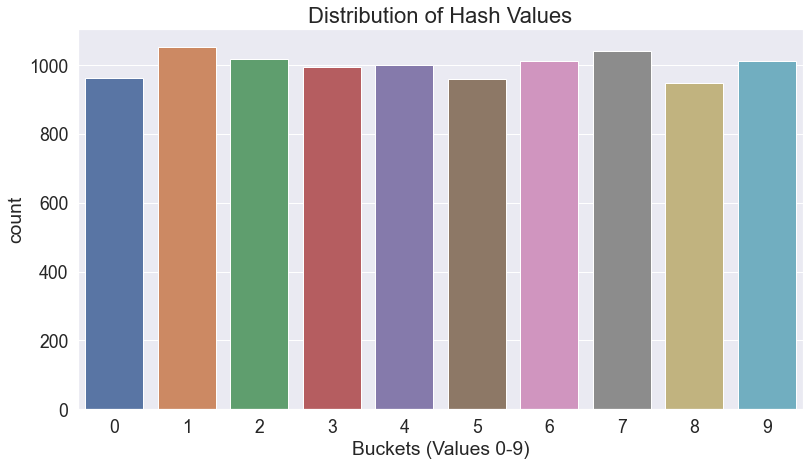

In [20]:
hash_list = []

for i in range(10000):
    our_string = ''.join(random.choices(string.ascii_lowercase + string.digits, k=5))
    hash_value = nBucket_hash(our_string, 10)
    hash_list.append(hash_value)

    
sns.set(font_scale = 1.6, rc={'figure.figsize':(13,7)})
sns.countplot(x=np.array(hash_list))
plt.xlabel("Buckets (Values 0-9)")
plt.title("Distribution of Hash Values", fontsize=22);

Assume each list nested within little_table represents a bucket.

In [21]:
little_table = [[] for x in range(10)]
little_table

[[], [], [], [], [], [], [], [], [], []]

Then in theory, we should be able to assign a random string to a bucket based on it's hash value!

Let's try generating 10 random strings and assigning them to their corresponding bucket

In [22]:
for i in range(10):
    our_string = ''.join(random.choices(string.ascii_lowercase + string.digits, k=5))
    print(our_string)
    hash_value = nBucket_hash(our_string, 10)
    little_table[hash_value].append(our_string)
    
print()
print("Little Table:")
for i in range(len(little_table)):
    print(i, little_table[i])

296qy
0s6i2
0v5np
2phwb
8egns
oeeic
2txa2
eq9ng
udlmj
8ek81

Little Table:
0 ['0v5np']
1 []
2 ['udlmj']
3 ['8egns', '2txa2']
4 ['oeeic', '8ek81']
5 ['eq9ng']
6 []
7 []
8 ['296qy']
9 ['0s6i2', '2phwb']


There are likely collisions in the above table (multiple strings in one bucket)--unless randomly each string was assigned a different bucket. How might we decrease the likelihood of collisions?

In [23]:
big_table = [[] for x in range(31)]

for i in range(10):
    our_string = ''.join(random.choices(string.ascii_lowercase + string.digits, k=5))
    hash_value = nBucket_hash(our_string, 31)
    big_table[hash_value].append(our_string)
    
print("Big Table")
for i in range(len(big_table)):
    print(i, big_table[i])

Big Table
0 []
1 ['vf3z2']
2 []
3 []
4 []
5 ['qo2ha']
6 ['04mya']
7 ['jiort']
8 []
9 []
10 []
11 []
12 ['o0433']
13 ['25n8e']
14 []
15 ['qepte']
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 ['fx6q1']
25 []
26 []
27 []
28 []
29 ['1y723']
30 ['w1irg']


Ok so let's say that I want to know which bucket an element X lives. How might I do that?

In [24]:
# where does __ live?
nBucket_hash('e9box', 20)

11

All we have to do is hash X and we will get in response the corresponding location where X would be located in the table!